# Dungeons and Data
## by Benjamin David Knight

## Preliminary Wrangling

> I was able to find online a dataset of over 800 unique characters created by different individuals on the app "Fifth Edition Character Creator" which, obviously, allows one to create a character for the popular game "Dungeons and Dragons" (D&D). The characters in the game have a variety of statistics and qualities that I'll be able to explore to see if trends exist in which characters are created, what stats and feats tend to be favored, and what other factors may affect those choices.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

The first step is to load the tsv file I downloaded from github.

In [2]:
dndf = pd.read_csv('C:\\Users\\6440\\Documents\\Udacity\\Visualization Project\\datasets\\uniquednd.tsv', sep='\t')

In [3]:
#Taking a preliminary look at the dataframe as a whole

dndf.head(10)

,name,race,background,date,class,justClass,subclass,level,feats,HP,...,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons,levelGroup
0,22bf79,Deep Gnome,Acolyte,2018-07-24T22:37:38Z,Warlock 20,Warlock,The Celestial,20,NaN,260,...,Dagger|Dagger,Light*0|Sacred Flame*0|Eldritch Blast*0|Presti...,07 24 18,NaN,NaN,NaN,Gnome,Light*0|Sacred Flame*0|Eldritch Blast*0|Presti...,Dagger,19-20
1,b1bd6b,Human,Hermit,2018-08-01T01:25:29Z,Monk 20,Monk,Way of the Four Elements,20,Mobile|Observant,200,...,Dagger|Dart|Unarmed strike,NaN,07 31 18,NaN,NaN,NaN,Human,NaN,Dagger|Dart|Unarmed Strike,19-20
2,e9a755,Wood Elf,Guild Artisan,2018-07-09T17:23:10Z,Wizard 20,Wizard,School of Conjuration,20,Spell Sniper|Elven Accuracy|Elemental Adept|Wa...,122,...,Quarterstaff,Blade Ward*0|Firebolt*0|Green-Flame Blade*0|Ra...,07 09 18,NaN,NaN,NaN,Elf,Blade Ward*0|Fire Bolt*0|Green-Flame Blade*0|R...,Quarterstaff,19-20
3,68bf99,Kenku,Clan Crafter,2018-06-17T23:06:53Z,Warlock 20,Warlock,The Great Old One,20,Actor|War Caster,220,...,"Crossbow, light|Dagger|Dagger",NaN,06 17 18,NaN,NaN,NaN,Kenku,NaN,"Crossbow, Light|Dagger",19-20
4,7b7c1c,Human,Folk Hero,2018-09-08T19:42:47Z,Cleric 20,Cleric,War Domain,20,NaN,203,...,Spear|ThePowerhead|GaeBolga,Divine Favor*1|Shield of Faith*1|Magic Weapon*...,09 08 18,NaN,NaN,NaN,Human,Divine Favor*1|Shield of Faith*1|Magic Weapon*...,Spear,19-20
5,c4f62f,Dragonborn,Hermit,2018-04-29T21:11:31Z,Barbarian 20,Barbarian,Path of the Totem Warrior,20,NaN,285,...,Greataxe|Handaxe|Javelin,NaN,04 29 18,NaN,NaN,NaN,Dragonborn,NaN,Greataxe|Handaxe|Javelin,19-20
6,1ed728,Half-Elf,Faction Agent,2018-04-21T14:08:42Z,Sorcerer 20,Sorcerer,Draconic Bloodline,20,Actor|Alert|Spell Sniper|Elven Accuracy|Elemen...,182,...,"Crossbow, light|Dagger",NaN,04 21 18,NaN,NaN,NaN,Half-Elf,NaN,"Crossbow, Light|Dagger",19-20
7,eecfc2,Tiefling,Charlatan,2018-05-17T23:12:06Z,Warlock 20,Warlock,The Hexblade,20,Heavily Armored,260,...,Dagger|Greataxe,NaN,05 17 18,NaN,NaN,NaN,Tiefling,NaN,Dagger|Greataxe,19-20
8,7ff7d2,Tiefling,Noble,2018-05-17T23:13:52Z,Paladin 20,Paladin,Oath of Ancients,20,Tough|Lucky,280,...,Javelin|Greataxe|Longsword,Ensnaring Strike*1|Speak with Animals*1|Moonbe...,05 17 18,NaN,NaN,NaN,Tiefling,Ensnaring Strike*1|Speak with Animals*1|Moonbe...,Javelin|Greataxe|Longsword,19-20
9,370d36,Gray Dwarf,Acolyte,2018-07-06T21:03:30Z,Paladin 19,Paladin,Oath of Ancients,19,War Caster|Skilled|Resilient,266,...,Longsword,Ensnaring Strike*1|Speak with Animals*1|Moonbe...,07 06 18,NaN,NaN,NaN,Dwarf,Ensnaring Strike*1|Speak with Animals*1|Moonbe...,Longsword,19-20


In [4]:
#And to see how many characters are being worked with here.

dndf.shape

(885, 29)

### Dataset Structure:

> The dataset is a little messy, but overall straightforward. It has 885 unique rows and 29 columns; many of which are either redundant, irrelevant, or both. The column descriptions are listed on the github page they were retrieved from (https://github.com/oganm/dndstats/blob/master/README.md#data-access), they are as follows:
name: This column has hashes that represent character names. If the hashes are the same, that means the names are the same. Real names are removed to protect character anonymity. Yes D&D characters have rights.

>* **name:** This column has hashes that represent character names. If the hashes are the same, that means the names are the same. Real names are removed to protect character anonymity. Yes D&D characters have rights.

>* **race:** This is the race field as it come out of the application. It is not really helpful as subrace and race information all mixed up together and unevenly available. It also includes some homebrew content. You probably want to use the processedRace column if you are interested in this.

>* **background:** Background as it comes out of the application.

>* **date:** Time & date of input. Dates before 2018-04-16 are unreliable as some has accidentally changed while moving files around.

>* **class:** Class and level. Different classes are separated by | when needed.

>* **justClass:** Class without level. Different classes are separated by | when needed.

>* **subclass:** Subclasses. Again, separated by | when needed.

>* **level:** Total character level.

>* **feats:** Feats chosen by character. Separated by | when needed.

>* **HP:** Character HP.

>* **AC:** Character AC.

>* **Str, Dex, Con, Int, Wis, Cha:** ability scores

>* **alignment:** Alignment free text field. It is a mess, don't touch it. See processedAlignment,good and lawful instead.

>* **skills:** List of skills with proficiency. Separated by |.

>* **weapons:** List weapons. Separated by |. It is somewhat of a mess as it allows free text inputs. See processedWeapons.

>* **spells:** List of spells and their levels. Spells are separated by |s. Each spell has its level next to it separated by *s. This is a huge mess as its a free text field and some users included things like damage dice in them. See processedSpells.

>* **day**: A shortened version of date. Only includes day information.

>* **processedAlignment:** Processed version of the alignment column. Way people wrote up their alignments are manually sifted through and assigned to the matching aligmment. First character represents lawfulness (L, N, C), second one goodness (G,N,E). An empty string means alignment wasn't written or unclear.

>* **good, lawful:** Isolated columns for goodness and lawfulness.

>* **processedRace:** I have gone through the way race column is filled by the app and asigned them to correct races. If empty, indiciates a homebrew race not natively supported by the app.

>* **processedSpells:** Formatting is same as the spells column but it is cleaned up. Using string similarity I tried to match the spells to the full list of spells available in the official publications. The spell is removed if the spell I guessed does not have the correct level or doesn't include all words of the original spell and has too many modifications to be recognizable. It may have a few false matches but it should be mostly fine

>* **processedWeapons:** Similar to processedSpells, weapons column is matched to the closest official weapon with some restrictions.

>* **levelGroup:** splits levels into groups as used in the feat percentage plot. Only present in the filtered data but easy enough to make on your own.

### Main dataset features of interest:

> There's a lot of really useful data in here to explore. The main points of interest I'll be looking into will be classes and races, because those combinations will largely influence the selection of other stats and feats at later stages. Those stats are Strength (Str), Dexterity (Dex), Constitution (Con), Intelligence (Int), Wisdom (Wis), and Charisma (Cha) and I would be interested in seeing if certain stats are favored more over others. Seeing if certain alignments are correlated with certain character builds or backgrounds.

### Supplemental features to aid investigation:

> Subclasses, spells, and proficiencies (skills) all seem like really cool information to find more specific answers to questions that may come up, but may not do much for discovery on their own. The date column seems off-hand like it could be very interesting, but the creator claims it to be a little inaccurate, and so may only reserve its use to look at broader trends.

## Dataset Cleaning

>The data here is wonderfully comprehensive, but also contains a lot of junk data, or data that we can't really work with. For instance it does me no good to have a column that gives the class level, when there is a column for both level and class separately (I realize that column probably aids with discerning multi-classing, but I don't need that data, as it is available elsewhere). So my next step will be to both remove any irrelevant columns from the dataframe.

In [5]:
#Very quickly getting a count on multiclassed characters, to see if they are statistically relevant

dndf.loc[(dndf['class'].str.len() >= 13) & (dndf['class'].str.contains('Blood Hunter')==False)].shape[0]

122

Fascinating, so multiclassing comprises almost 14% of the database. This is statistically significant. Luckily both the **class** and **justclass** contain multiclass information, so I can safely remove the class column without loss of significant data. I will also be removing the following columns:

>**name:** This is irrelevant, and would only tell me how often multiple people use the same name.

>**race:** This data, by the owner's own admission, isn't accurate and I will be instead using the processedRace column

>**alignment:** Described by the creator as an 'untouchable mess', I'll take their advice here and find the data in the 'processedAlignment' column instead.

>**good, lawful:** these seem redundant with the processedAlignment column existing

>**weapons, spells, processedSpells, processedWeapons:** There is far too much write-in data here, and more importantly unless I were interested in tracking trends in a very specific item this data isn't helpful.

>**day:** This data is irrelevant to me

In [6]:
#Dropping the columns mentioned above

dndf_trim = dndf.drop(columns=['class', 'name', 'race', 'alignment', 'good', 'lawful', 'weapons', 'spells', 'processedSpells', 'processedWeapons', 'day'])

In [7]:
#Test

dndf_trim.head(10)

,background,date,justClass,subclass,level,feats,HP,AC,Str,Dex,Con,Int,Wis,Cha,skills,processedAlignment,processedRace,levelGroup
0,Acolyte,2018-07-24T22:37:38Z,Warlock,The Celestial,20,NaN,260,15,18,18,20,22,24,20,Sleight of Hand|Stealth|History|Religion|Insig...,NaN,Gnome,19-20
1,Hermit,2018-08-01T01:25:29Z,Monk,Way of the Four Elements,20,Mobile|Observant,200,20,13,20,15,12,21,11,Acrobatics|History|Religion|Insight|Medicine,NaN,Human,19-20
2,Guild Artisan,2018-07-09T17:23:10Z,Wizard,School of Conjuration,20,Spell Sniper|Elven Accuracy|Elemental Adept|Wa...,122,13,10,16,14,20,14,12,Arcana|Insight|Medicine|Perception|Persuasion,NaN,Elf,19-20
3,Clan Crafter,2018-06-17T23:06:53Z,Warlock,The Great Old One,20,Actor|War Caster,220,16,12,20,16,14,14,21,Stealth|Arcana|History|Religion|Insight|Deception,NaN,Kenku,19-20
4,Folk Hero,2018-09-08T19:42:47Z,Cleric,War Domain,20,NaN,203,24,20,16,20,12,20,15,Religion|Animal Handling|Insight|Survival,NaN,Human,19-20
5,Hermit,2018-04-29T21:11:31Z,Barbarian,Path of the Totem Warrior,20,NaN,285,20,24,16,24,12,12,12,Religion|Medicine|Survival|Intimidation,NaN,Dragonborn,19-20
6,Faction Agent,2018-04-21T14:08:42Z,Sorcerer,Draconic Bloodline,20,Actor|Alert|Spell Sniper|Elven Accuracy|Elemen...,182,17,14,18,18,15,18,24,Arcana|Insight|Perception|Deception|Intimidati...,NaN,Half-Elf,19-20
7,Charlatan,2018-05-17T23:12:06Z,Warlock,The Hexblade,20,Heavily Armored,260,18,8,10,20,12,14,20,Sleight of Hand|Investigation|Deception|Intimi...,NaN,Tiefling,19-20
8,Noble,2018-05-17T23:13:52Z,Paladin,Oath of Ancients,20,Tough|Lucky,280,20,20,12,14,12,12,20,Athletics|History|Intimidation|Persuasion,NaN,Tiefling,19-20
9,Acolyte,2018-07-06T21:03:30Z,Paladin,Oath of Ancients,19,War Caster|Skilled|Resilient,266,21,20,14,19,8,12,18,Religion|Insight|Medicine|Perception|Deception...,NaN,Dwarf,19-20


>This is already so much easier to read! Now on to our explorations.

## Univariate Exploration

#### Alignment:
Let's start by looking at alignment. Alignment dictates your character's morality and is always one of nine combinations of: Lawful, Neutral, and Chaotic with Good, Neutral, and Evil. There wasn't as much data respectively as it wasn't a required entry in the creator, but I think the data available will still prove useful in seeing what types of characters people wanted to embody.

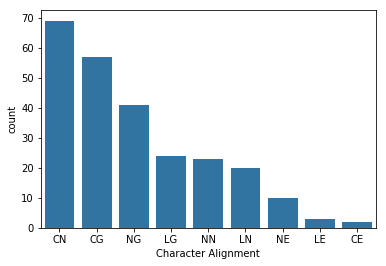

In [12]:
#setting the order and color of the bar plot
alignorder = dndf_trim['processedAlignment'].value_counts().index
default_color = sb.color_palette()[0]

#Test
alchart=sb.countplot(data = dndf_trim, x = 'processedAlignment', order = alignorder, color=default_color)
alchart.set(xlabel='Character Alignment');

#### Level Groups:

>As with most games the higher your character level, the more powerful the character as different feats are unlocked and stats are upgraded. Let's see at what levels most people wanted to introduce their characters to the world.

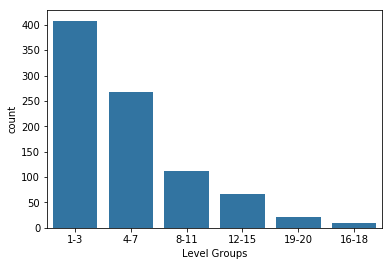

In [14]:
#Setting the level order
levelorder = dndf_trim['levelGroup'].value_counts().index

#creating a bar graph of each level group
lvlchart=sb.countplot(data=dndf_trim, x='levelGroup', order=levelorder, color=default_color)
lvlchart.set(xlabel='Level Groups');

C:\Users\6440\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


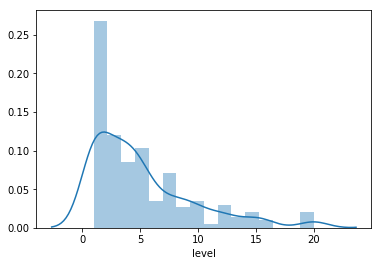

In [59]:
sb.distplot(dndf_trim['level'])

#### Character Races:

>D&D is a fantasy role playing game that allows you to assume the role of any number of player races. From scaley Dragonborns to mystical Elves, I'm curious to see which has captured the imagination of players the most.

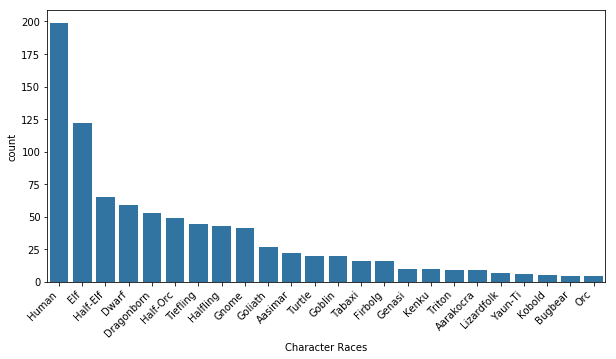

In [22]:
#Setting up the order and size of the bar chart
plt.figure(figsize=(10,5))
raceorder = dndf_trim['processedRace'].value_counts().index

#creating a bar chart to count the number count of each race of character
racechart = sb.countplot(data=dndf_trim, x='processedRace', order=raceorder, color=default_color)
racechart = racechart.set_xticklabels(racechart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel("Character Races");

#### Stats:

>A crucial part of D&D are stats. Let's see the distribution of stats across characters

C:\Users\6440\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


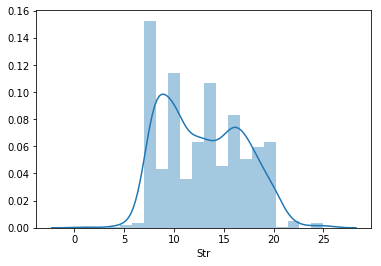

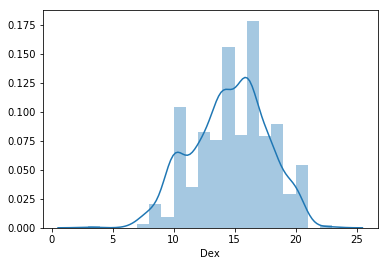

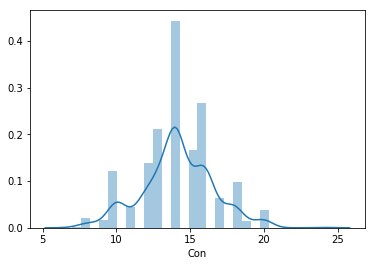

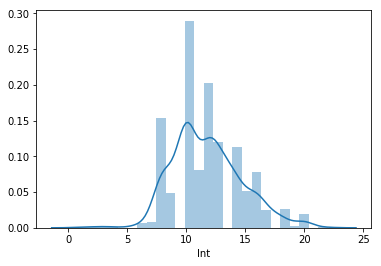

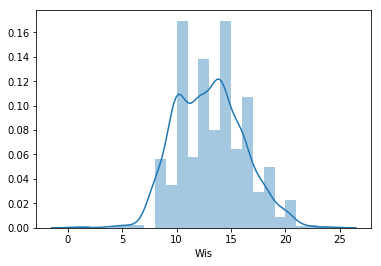

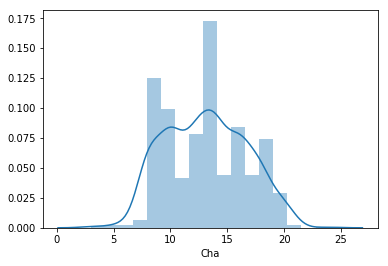

In [54]:
stats = ['Str','Dex','Con','Int','Wis','Cha']

def statgraph():
    for x in stats:
        df = dndf_trim[x]
        plt.figure() #this creates a new figure on which your plot will appear
        sb.distplot(df);
        
        
statgraph()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> The Alignment graph was very interesting as it showed that currently Lawful characters are far less popular than Chaotic or Neutral characters. In fact with the exception of Evil alignments Lawful characters ranked the lowest for their respective moralities. Gone are the days of the stalwart do-gooder knights of old, and now we see the rise of more morally grey anti-heroes which have become increasingly popular. It's also worth nothing that alignment plays a less severe role in 5th Edition (5e) Dungeons and Dragons (D&D) which makes it easier to get away with not being a purely good character.

>The level-grouping graph suggests strongly that players tend to create lower-level characters. Characters in the level 16-18 range were actually the lowest count.

>It seems that in a world of infinite possibilities, the race human beings want most to play as... are human beings. This is amusing, but potentially easily explainable. The rest of this graph makes sense, the core races are the most commonly played while the later introduced, rarer, and more complex races show up much less often.

>The stat distributions are so interesting, it off hand tells me that most stats are in the middle or right leaning which makes sense. Even though it's on a scale from 1 to 20-25 it's very rare for a skill to be below a 6-8. The default point array is 15,14,13,12,10,8 so it doesn't surprise me that there's little deviation from that. I plan to revisit this data for more clear side-by-side comparison in the multivariate exploration.


### Were there any interesting or surprising interactions between features?
>I didn't expect the level. My prediction would be that most of created characters would either be levels 1-3 or 19-20, not this where the level groups go almost entirely in ascending order. The fact that the 16-18 group falls to the back out of the order is likely due to the fact that most campaigns will either start low level, or jump all the way to a level 20 story for fun. It's not common to start so high a level. This is likely in part because part of the joy of playing D&D is seeing your characters become stronger over time, and gaining new abilities and skills to bring to the table. Starting at levels 16-18 reduces that fun.

>While the fact that Humans are the most commonly chosen race may seem odd at first glance there is likely a mechanical reason for this outcome. Humans have a racial feat to add one point to every stat at first level or, alternatively, to take fewer points and gain a feat (the only race to allow for a first-level feat.) This versitility and feat-granting make Humans well suited to fit almost any situation. Also the wish fulfillment factor of D&D may mean people wish to play empowered versions of themselves as they already are.


## Bivariate Exploration

#### Stats Revisited:

>While seeing the distribution of stats was really interesting I'm curious if any correlation exists between each other, or even races or classes. I'll put together a function to more easily test these:

In [26]:
#This function will normally run to create a matrix of scatter plots between the stats of all characters, but if a race is
#added as a kwarg then it will only create a plot for characters of that race

def makePlot(cl=''):
    df_use = dndf_trim[dndf_trim['processedRace'] == cl].copy() if cl != '' else dndf_trim
    dnd_stats = ['Str','Dex','Con','Int','Wis','Cha']
    statgrid = sb.PairGrid(data=df_use, vars=dnd_stats)
    statgrid.map(plt.scatter)

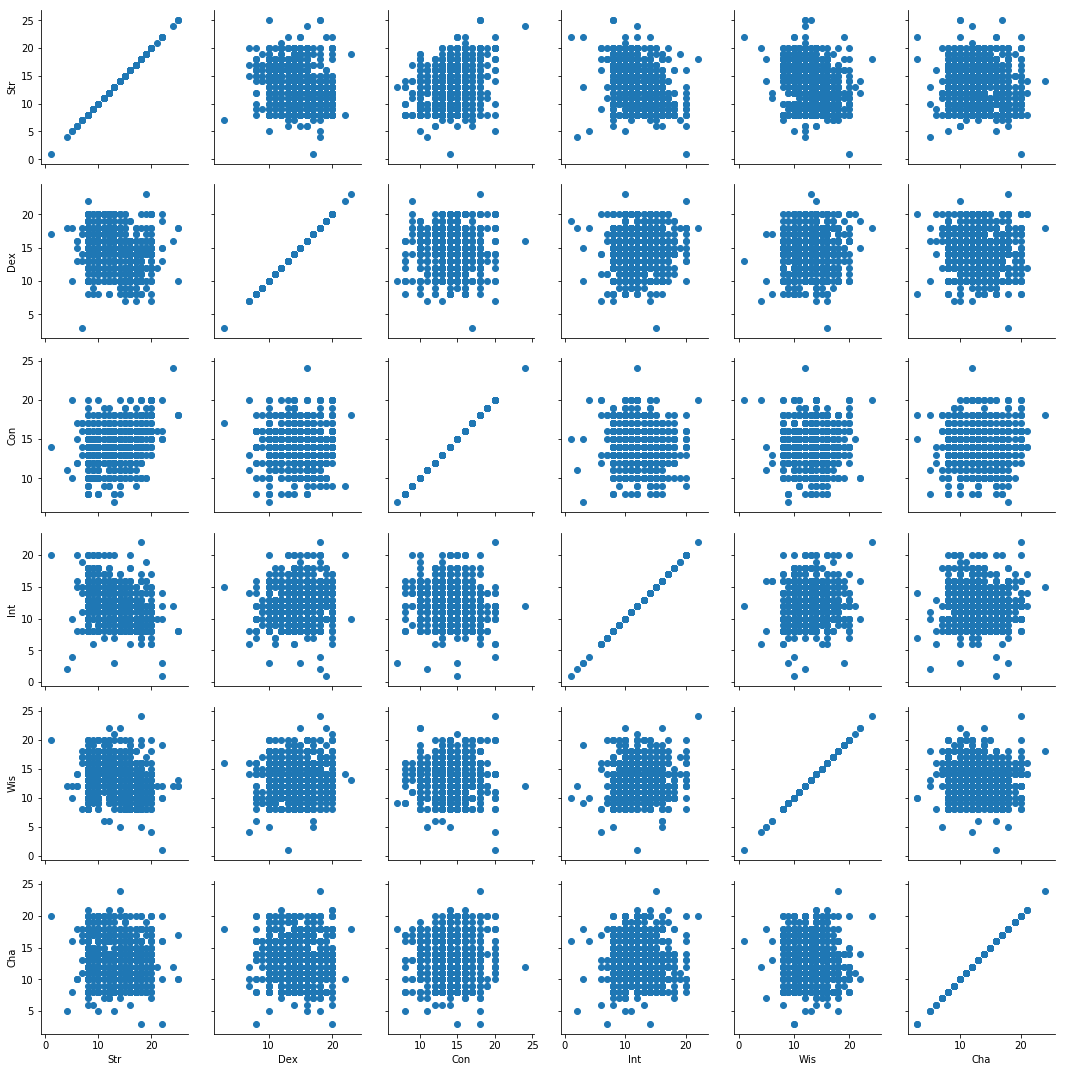

In [27]:
makePlot()

>This hasn't really shown anything at all. Little to no apparent correlation exists here. That being said some races are more well suited to certain stats than others, perhaps we'll see a pattern there. Tielflings tend to be used more for magic use and less for close combat roles, so perhaps there is where we'll see a good pattern:

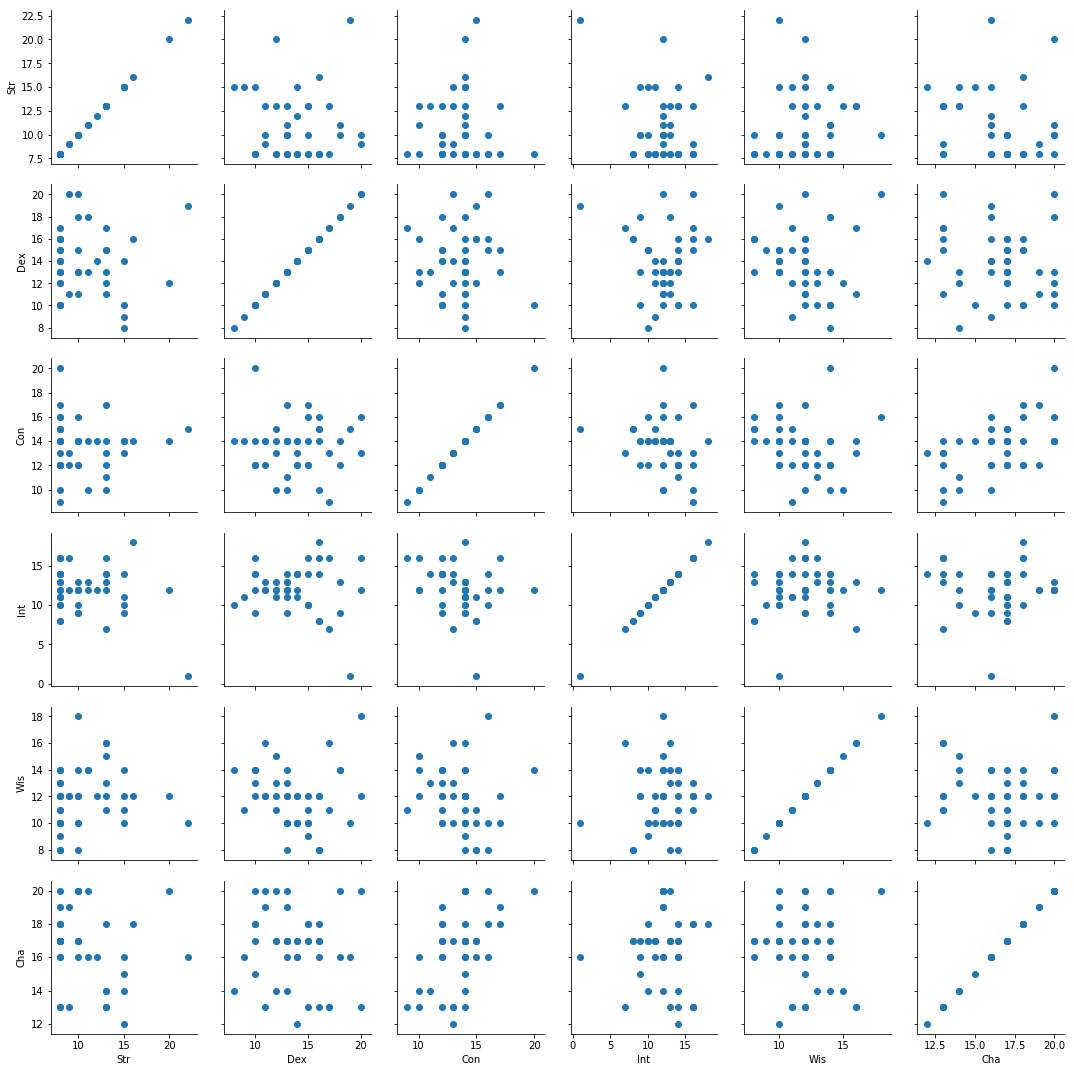

In [28]:
makePlot('Tiefling')

> As stated above, stats can be so widely varied that finding any specific patterns may be tricky. I'm going to try one more thing. Classes are where most stat specializations come into play. Barbarians need to prioritize Str and Monks need to prioritize Dex to be truly effective. Let's take a look at these two specialized classes and see what we find:

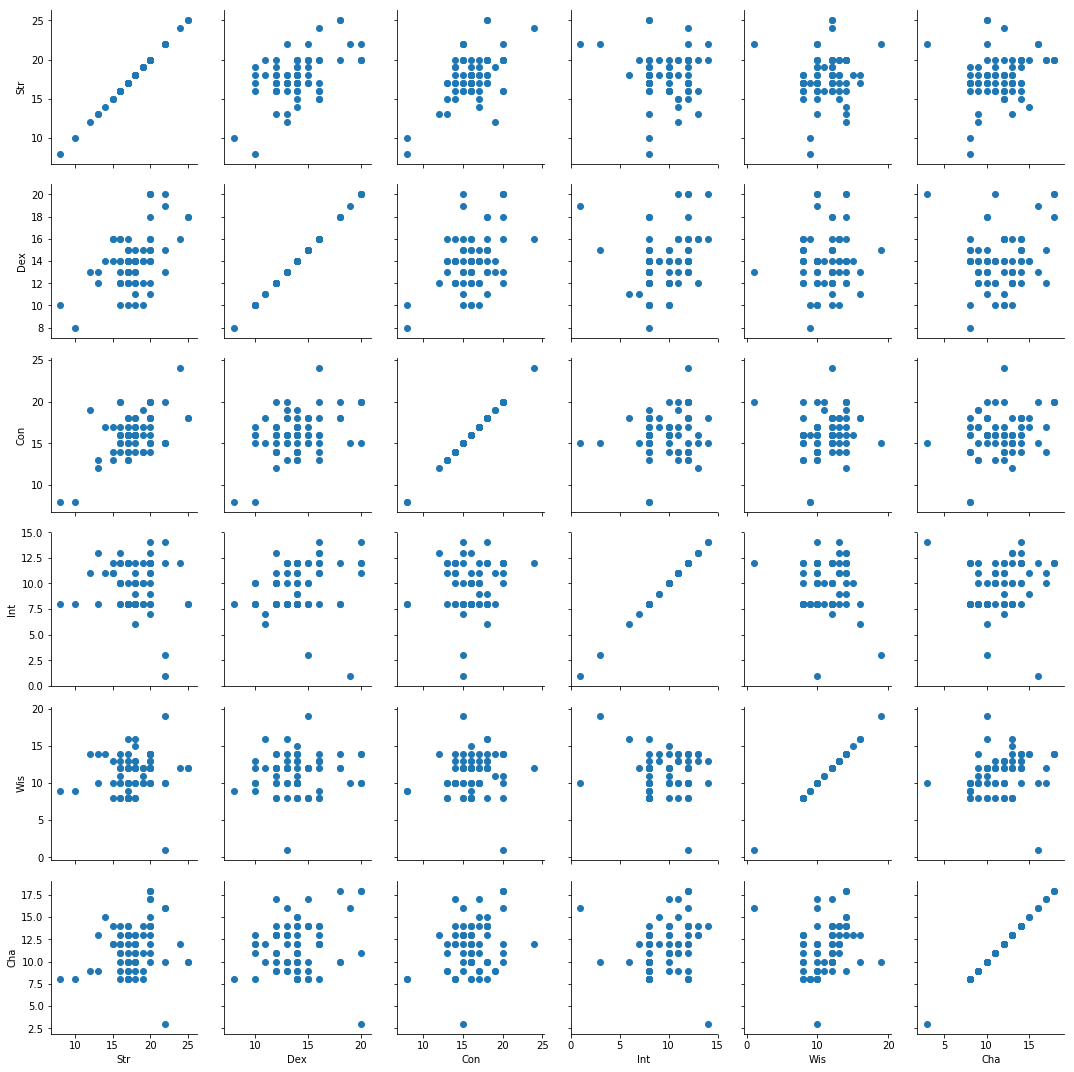

In [29]:
#The same as the above function, but the kwarg accepts a class instead of a race

def makePlotclass(cl=''):
    df_use = dndf_trim[dndf_trim['justClass'] == cl].copy() if cl != '' else dndf_trim
    dnd_stats = ['Str','Dex','Con','Int','Wis','Cha']
    statgrid = sb.PairGrid(data=df_use, vars=dnd_stats)
    statgrid.map(plt.scatter)
    
makePlotclass('Barbarian')

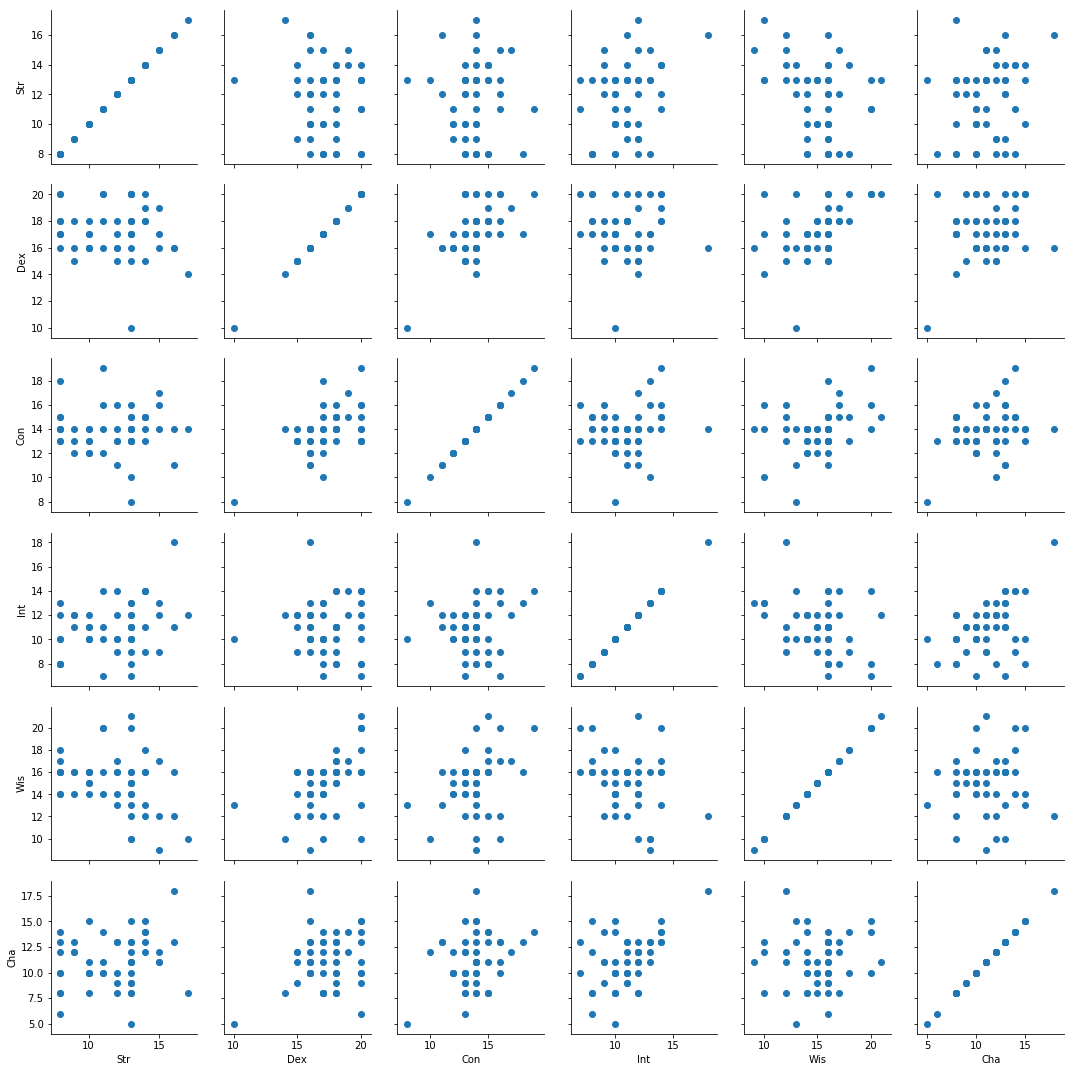

In [30]:
makePlotclass('Monk')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
>It doesn't seem like there was really any correlation in the scatter plot of stats across all characters. This makes sense, as the customization of characters is so varied that having a high Str score doesn't negate the possibility of also having a high Int or Wis score. Though the plots that only compared stats of specific races didn't really lead to any bigger conclusions, it's clear a pattern started to take shape. Most of those seemed to have no correlation here, except there seemed to be loose negative correlations between Wis and both Con and Dex while there seemed to be a loose positive correlation between Cha and Wis and *maybe* a very loose correlation between Int and Dex.

>As expected there are much clearer relationships between classes and state, though still nothing is very strong. The Barbarian has moderate positive corellations between Str and Con, Str and Dex, and Wis and Cha; while the Monk has the same between Int and Cha, Con and Dex, and Dex and Wis. This lines up very well with how the characters are represented in game.


### Were there any interesting or surprising interactions between features?
>Honestly at first blush I had very much expected a strong correlation between races or classes, and stats. I had also expected a much stronger corellation among just stats overall, but hadn't taken into account the wide variety of character's one can make with this wonderful game. As a final note for this portion I hadn't expected certain corellations, mainly between Cha and Int or Wis and Cha.


## Multivariate Exploration

#### Class and Race:

>Now that we've seen how stats affect both class and race, maybe we can find some interesting information as to how those two categories interact. First let's make a heat map to see what combinations are most common:

In [31]:
#Let's get the data trimmed and cleaned for the heat map

counts = dndf_trim.groupby(['justClass','processedRace']).size()
counts = counts.reset_index(name='count')
counts = counts.pivot(index='processedRace', columns='justClass', values = 'count').fillna(0)

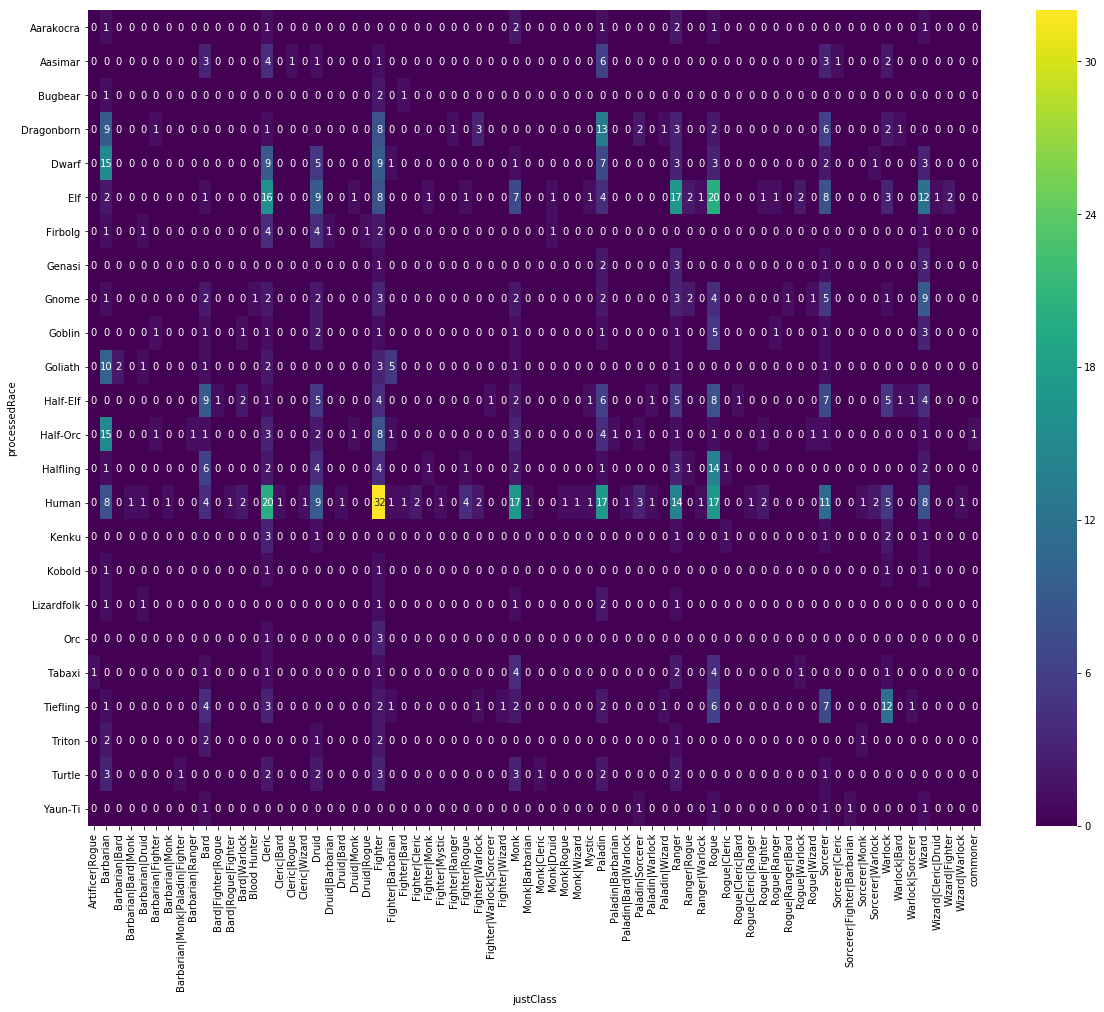

In [33]:
#Test

plt.subplots(figsize=(20,15))
sb.heatmap(counts, cmap = 'viridis', annot=True, annot_kws={"size": 10});

>This is a bit cluttered, maybe trimming the multiclassing will draw a clearer picture as it doesn't seem particularly populated

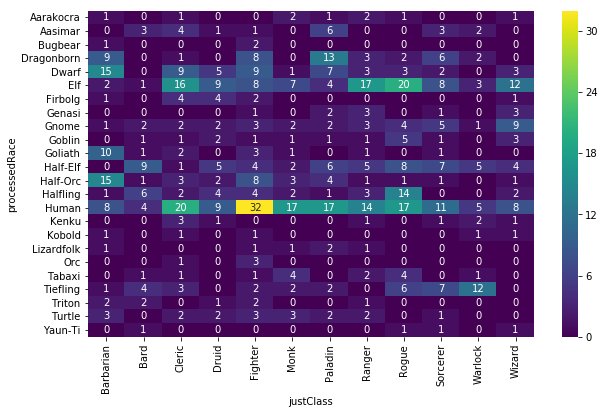

In [35]:
#Removing the multiclass categories and trying again.

counts2 = counts[['Barbarian','Bard','Cleric','Druid','Fighter','Monk','Paladin','Ranger','Rogue','Sorcerer','Warlock','Wizard']]
plt.subplots(figsize=(10,6))
sb.heatmap(counts2, cmap = 'viridis', annot=True, annot_kws={"size": 10});

#### Stats Revisited pt.2:

>Now that we've seen stat single distribution, and stat correlation, let's see how the stats compare to each other I'll be using a violin plot, as I feel it's better than a box plot for this sort of analysis.

C:\Users\6440\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


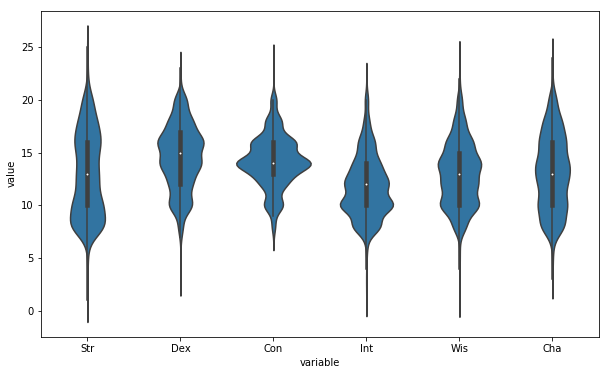

In [50]:
#Prepping stats for the violin plot
x = dndf_trim[['Str', 'Dex', 'Con', 'Int', 'Wis', 'Cha']].copy()
stats_cols = ['Str', 'Dex', 'Con', 'Int', 'Wis', 'Cha']
dndf_melt = pd.melt(dndf_trim, value_vars = stats_cols)

#Creating violin plots for each stat
plt.subplots(figsize=(10,6))
sb.violinplot(data=dndf_melt,x='variable',y='value',color=default_color);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
>There was a very clear relationship between class and race selections that were far more apparent than the relationship between stats and either of the two. By a far cry Human Fighters are the most common choice for character creation. This links back to the level groupings. It's likely a lot of new players are creating characters in the level 1-3 range, and a Human Fighter is a much easier class to play as for beginners. We can see again here that Humans sweep most classes. That said here are some other facts this graph reveals:

>* Tieflings are most commonly made as Warlocks
>* Tabaxi are predictably Monks or Rogues
>* Elves are somewhat surprisingly more commonly assigned to Rogues than magic-users
>* Half-Orcs and Goliaths are predictably Barbarians

>All this tells us that for the most part players try to best match the stat strengths of their races to what their classes call for. Characters with high Str racial feats are more likely to be fighters or barbarians, and characters like Tabaxi who favor Dex and speed are usually Monks or Rogues.

>Dex is more commonly a higher stat than even Str even though Str does have the highest max score. Int seems to average in around 10, with a median of 13.

### Were there any interesting or surprising interactions between features?
>If it weren't for the earlier analysis I would have been perhaps surprised to see a Human Fighter as the most likely choice for players. I would also have expected magic users to be a bit more common, but that could be my own personal bias toward playing that type.

>I would have imagined Con as higher than Dex (as it's usually recommended to be the second-highest stat), I also wouldn't have expected Int to come in so low. This, though surprising on the surface, does make some sort of sense. The only class that truly utalizes Int is Wizard, while other magic classes base off Wis or Cha.
